In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [261]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\clustering project\SG_2020.xlsx")

In [262]:
data.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,e_fg_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,28299,2020,3982,Alec Burks,NaN,SG,28,9,NBA,PHI,18,1,364,77,167,0.461,32,77,0.416,45,90,0.500,0.557,34,41,0.829,11,45,56,38,12,0,15,21,220
1,28308,2020,4143,Allen Crabbe,NaN,SG,27,7,NBA,ATL,28,1,522,52,143,0.364,30,93,0.323,22,50,0.440,0.469,9,12,0.750,10,55,65,28,15,4,12,36,143
2,28310,2020,4584,Allonzo Trier,NaN,SG,24,2,NBA,NYK,24,1,291,51,106,0.481,19,53,0.358,32,53,0.604,0.571,34,43,0.791,6,23,29,28,3,4,22,29,155
3,28312,2020,4690,Amir Coffey,NaN,SG,22,1,NBA,LAC,18,1,159,23,54,0.426,6,19,0.316,17,35,0.486,0.481,6,11,0.545,4,12,16,14,5,2,8,20,58
4,28321,2020,4586,Anfernee Simons,NaN,SG,20,2,NBA,POR,70,4,1449,214,536,0.399,75,226,0.332,139,310,0.448,0.469,76,92,0.826,25,127,152,97,26,10,61,135,579


In [263]:
pd.set_option('display.max_columns', None)

In [264]:
print(data)

     seas_id  season  player_id           player  birth_year pos  age  \
0      28299    2020       3982       Alec Burks         NaN  SG   28   
1      28308    2020       4143     Allen Crabbe         NaN  SG   27   
2      28310    2020       4584    Allonzo Trier         NaN  SG   24   
3      28312    2020       4690      Amir Coffey         NaN  SG   22   
4      28321    2020       4586  Anfernee Simons         NaN  SG   20   
..       ...     ...        ...              ...         ...  ..  ...   
137    28917    2020       3913  Wayne Ellington         NaN  SG   32   
138    28923    2020       3914  Wesley Matthews         NaN  SG   33   
139    28935    2020       4802     Zach Norvell         NaN  SG   22   
140    28936    2020       4802     Zach Norvell         NaN  SG   22   
141    28937    2020       4802     Zach Norvell         NaN  SG   22   

     experience   lg   tm   g  gs    mp   fg  fga  fg_percent  x3p  x3pa  \
0             9  NBA  PHI  18   1   364   77  1

In [265]:
pg_columns_to_keep =  ['pts', 'x3p', 'stl', 'orb', 'ast', 'trb', 'blk', 'gs', 'e_fg_percent', 'fg_percent', 'x3p_percent']


# Keep only the specified columns for a point guard
filtered_df_pg = data[pg_columns_to_keep]

# Display the resulting DataFrame
print(filtered_df_pg)

     pts  x3p  stl  orb  ast  trb  blk  gs  e_fg_percent  fg_percent  \
0    220   32   12   11   38   56    0   1         0.557       0.461   
1    143   30   15   10   28   65    4   1         0.469       0.364   
2    155   19    3    6   28   29    4   1         0.571       0.481   
3     58    6    5    4   14   16    2   1         0.481       0.426   
4    579   75   26   25   97  152   10   4         0.469       0.399   
..   ...  ...  ...  ...  ...  ...  ...  ..           ...         ...   
137  183   50   13    4   44   65    4   1         0.494       0.351   
138  494  108   38   22   92  166    9  67         0.524       0.396   
139   10    3    2    0    3    6    0   0         0.375       0.250   
140    0    0    0    0    0    1    0   0         0.000       0.000   
141   10    3    2    0    3    5    0   0         0.409       0.273   

     x3p_percent  
0          0.416  
1          0.323  
2          0.358  
3          0.316  
4          0.332  
..           ...  
13

In [266]:

filtered_df_pg_placeholder = filtered_df_pg.fillna(-1)


C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

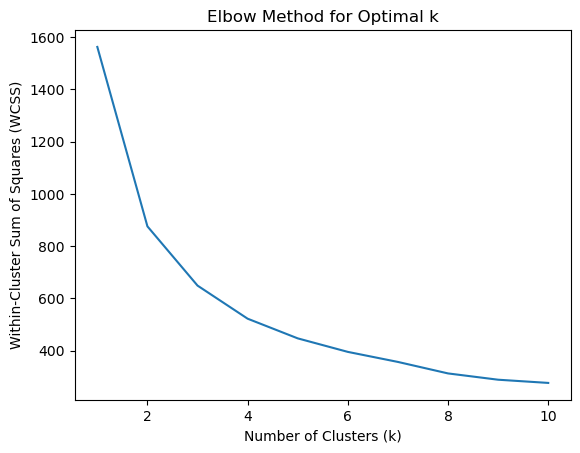

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'filtered_df_pg_placeholder' is your preprocessed DataFrame

# Impute any remaining missing values (if any)
imputer = SimpleImputer(strategy='mean')
filtered_df_pg_imputed = pd.DataFrame(imputer.fit_transform(filtered_df_pg_placeholder), columns=filtered_df_pg_placeholder.columns)

# Standardize the data
scaler = StandardScaler()
filtered_df_pg_standardized = scaler.fit_transform(filtered_df_pg_imputed)

# Use the Elbow Method to determine the optimal number of clusters (k)
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(filtered_df_pg_standardized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [268]:
optimal_k = 4

# Perform k-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(filtered_df_pg_standardized)

# Add the cluster labels to your DataFrame
filtered_df_pg_placeholder['Cluster'] = cluster_labels

# Display the resulting DataFrame with cluster labels
print(filtered_df_pg_placeholder)

C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


     pts  x3p  stl  orb  ast  trb  blk  gs  e_fg_percent  fg_percent  \
0    220   32   12   11   38   56    0   1         0.557       0.461   
1    143   30   15   10   28   65    4   1         0.469       0.364   
2    155   19    3    6   28   29    4   1         0.571       0.481   
3     58    6    5    4   14   16    2   1         0.481       0.426   
4    579   75   26   25   97  152   10   4         0.469       0.399   
..   ...  ...  ...  ...  ...  ...  ...  ..           ...         ...   
137  183   50   13    4   44   65    4   1         0.494       0.351   
138  494  108   38   22   92  166    9  67         0.524       0.396   
139   10    3    2    0    3    6    0   0         0.375       0.250   
140    0    0    0    0    0    1    0   0         0.000       0.000   
141   10    3    2    0    3    5    0   0         0.409       0.273   

     x3p_percent  Cluster  
0          0.416        0  
1          0.323        0  
2          0.358        0  
3          0.316       

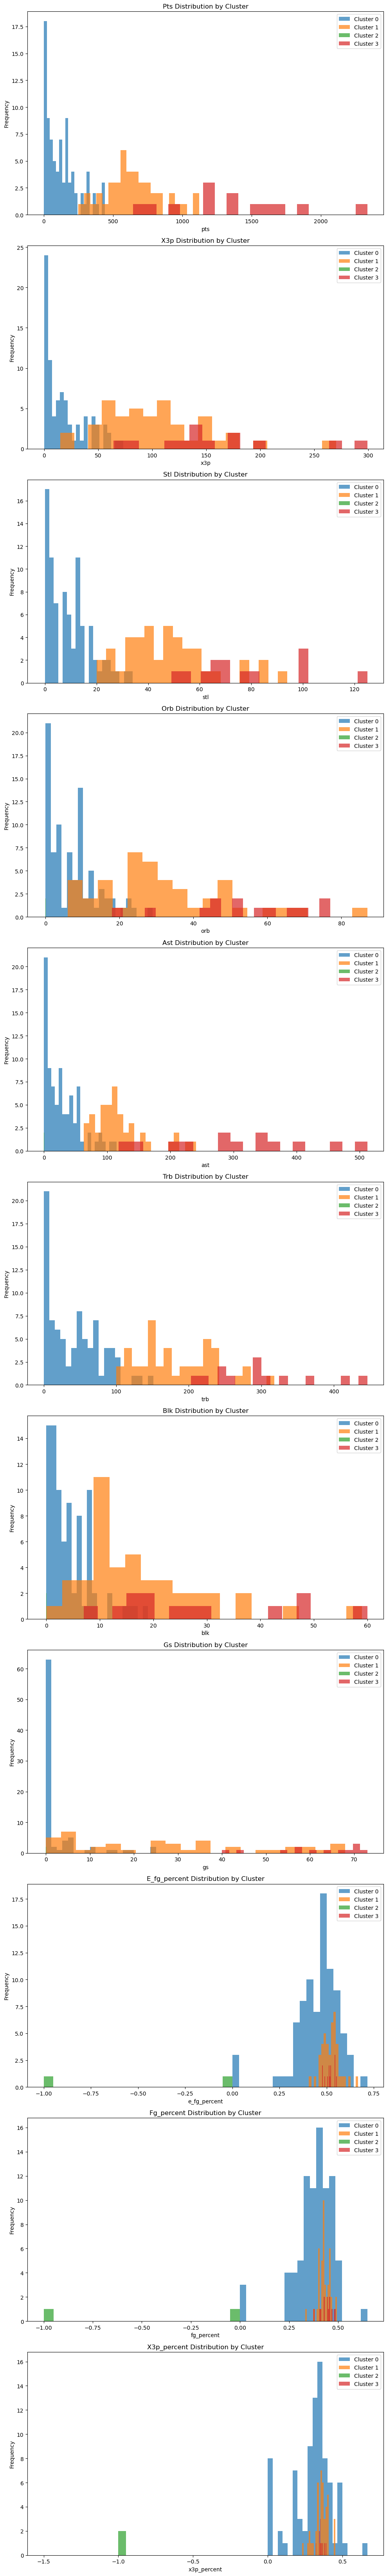

In [269]:
import matplotlib.pyplot as plt

# Features to plot
features_to_plot = ['pts', 'x3p', 'stl', 'orb', 'ast', 'trb', 'blk', 'gs', 'e_fg_percent', 'fg_percent', 'x3p_percent']

# Set up subplots
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(10, 6 * len(features_to_plot)))

# Plot each feature for each cluster
for i, feature in enumerate(features_to_plot):
    for cluster in range(optimal_k):
        # Select data for the current cluster
        cluster_data = filtered_df_pg_placeholder[filtered_df_pg_placeholder['Cluster'] == cluster]
        
        # Plot the feature for the current cluster
        axes[i].hist(cluster_data[feature], bins=20, alpha=0.7, label=f'Cluster {cluster}')

    # Set labels and title for each subplot
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].set_title(f'{feature.capitalize()} Distribution by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()
